# Student Academic Performance EDA
Data visualization is an interdisciplinary field that deals with the graphic representation of data. It is a particularly efficient way of communicating when the data is numerous as for example a Time Series.
**Our task is to visulize student performan with various factors. We will use Python's Pandas, NumPy, Seaborn, Matplotlib**

# Import libraries and data

In [1]:
# Import required libraries

import numpy as np
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import CSV using pandas library
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")


# Initial dataset understanding

In [3]:
# Let's see dataset structure and record values
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
# Review datastructure of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check if null value exists in dataset or not
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We don't have any null or missing values in dataset so it's pretty good dataset

# Data Visulisation

female    518
male      482
Name: gender, dtype: int64


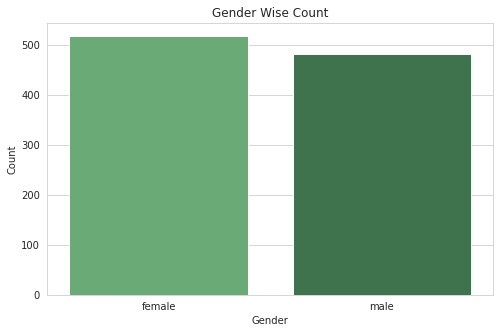

In [6]:
# Visulise number of male/female student in dataset
print(df.gender.value_counts())

# Visualize data
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='gender', data=df, palette='Greens_d')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Wise Count')
plt.show()

Out of 1000 students, 518 are female and 482 are male students

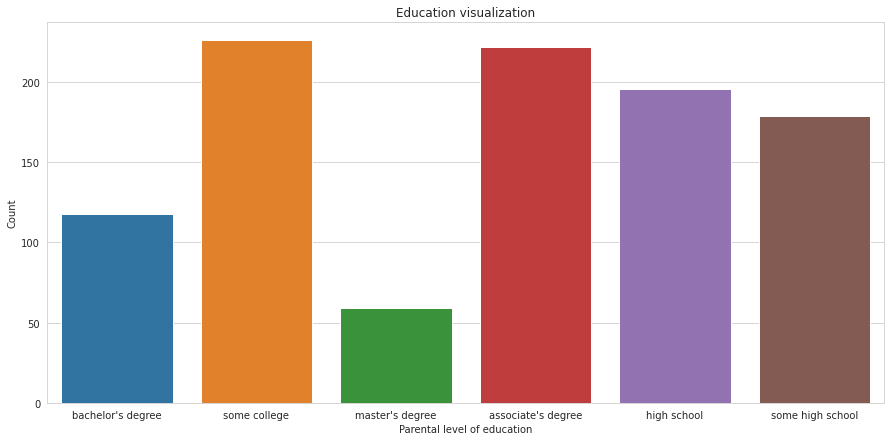

In [7]:
# Visualize education level

plt.figure(figsize=(15,7))
sns.countplot(x='parental level of education', data=df)
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.title('Education visualization')
plt.show()

Most of students has associate's degress and you can also see high school students are on no two

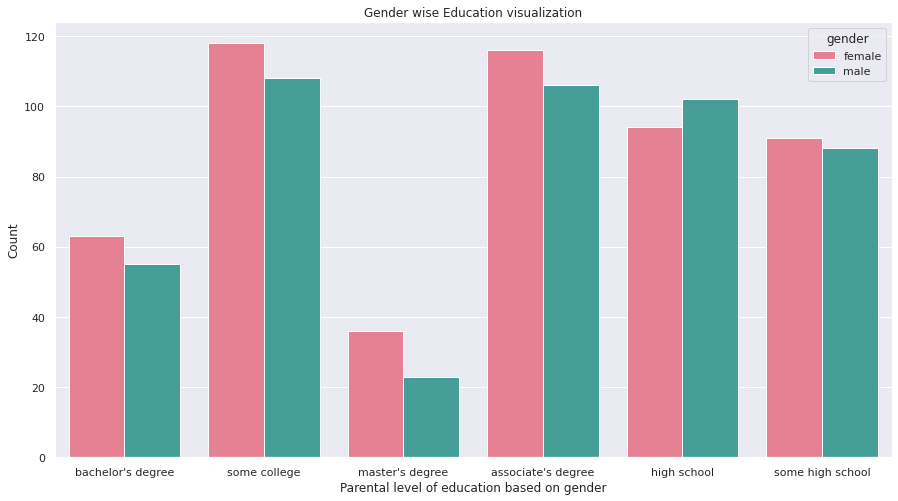

In [8]:
# Visualize gender wise education level

plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set(font_scale=1)
sns.countplot(x='parental level of education', hue="gender", data=df, palette='husl')
plt.xlabel('Parental level of education based on gender')
plt.ylabel('Count')
plt.title('Gender wise Education visualization')
plt.show()

Nice, Female education is very good comparing man. Number of females is greater than man in master degree. Its also same in bachelor's and high school

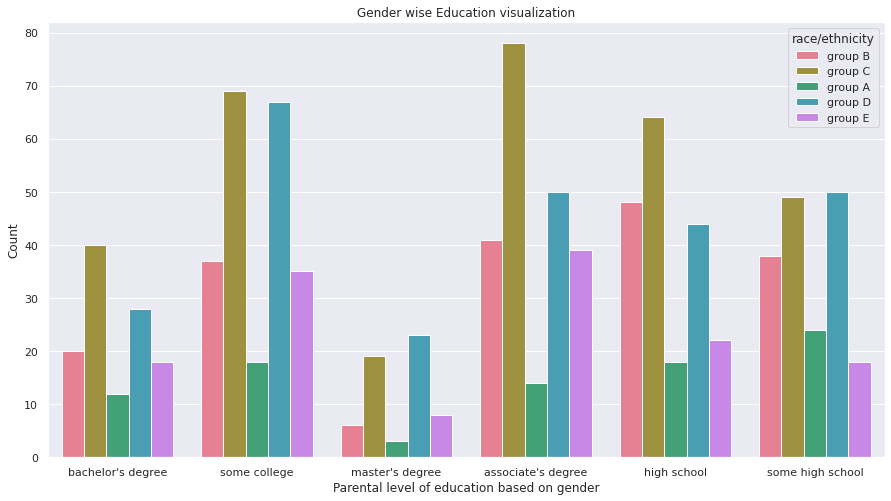

In [9]:
# Visualize race/ethnicity wise education level which will help to identify which good is more educated and which needs more focus

plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set(font_scale=1)
sns.countplot(x='parental level of education', hue="race/ethnicity", data=df, palette='husl')
plt.xlabel('Parental level of education based on gender')
plt.ylabel('Count')
plt.title('Gender wise Education visualization')
plt.show()

We can say group C is most educated in almost all degrees. Let's calculate percentage of education within groups

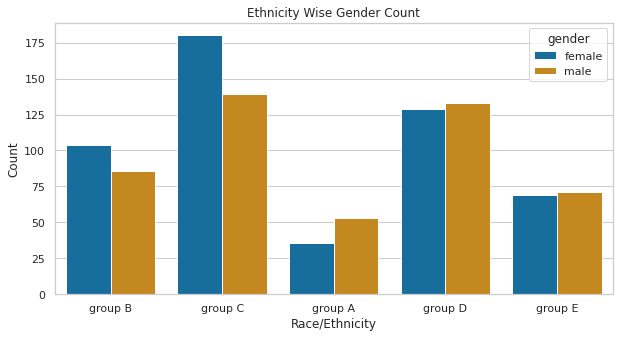

In [10]:
# Visualize ethnicity wise gender counts

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='race/ethnicity', data=df, palette='colorblind', hue="gender")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Wise Gender Count')
plt.show()

**In dataset, Majority females are in Group C and Group A is in minority**

<Figure size 720x360 with 0 Axes>

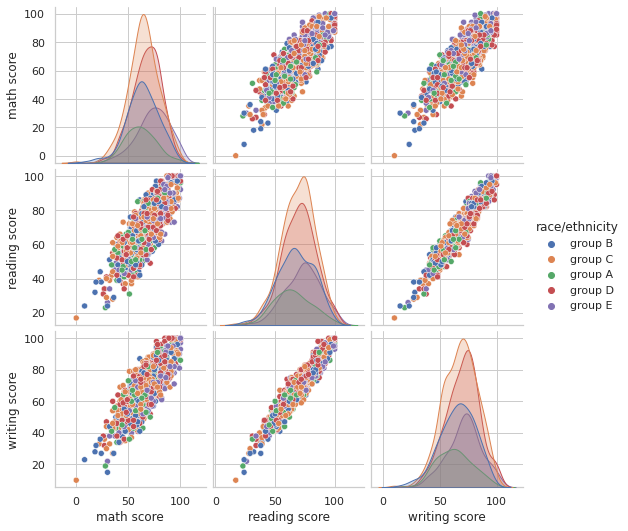

In [11]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.pairplot(df, hue="race/ethnicity")
plt.show()

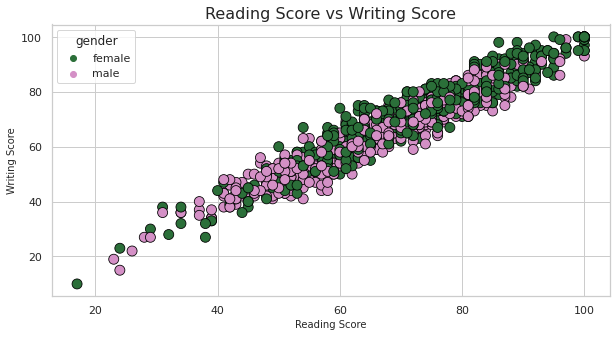

In [12]:
# Let's find ratio of writing and reading score by gender

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.title('Reading Score vs Writing Score',size=16)
plt.xlabel('Reading Score',size=10)
plt.ylabel('Writing Score',size=10)
sns.scatterplot(data=df, x='reading score', y='writing score', palette='cubehelix', hue='gender', s=100, edgecolor='black')
plt.show()

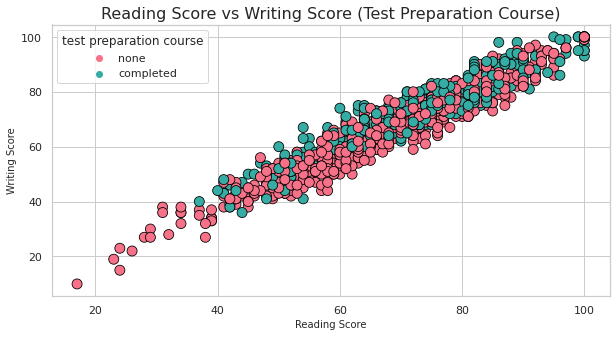

In [13]:
# Let's find ratio of writing and reading score by test preparation

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.title('Reading Score vs Writing Score (Test Preparation Course)',size=16)
plt.xlabel('Reading Score',size=10)
plt.ylabel('Writing Score',size=10)
sns.scatterplot(data=df, x='reading score', y='writing score', palette='husl', hue='test preparation course', s=100, edgecolor='black')
plt.show()

In [14]:
# Get percentage of each edicated ethnicity in group C
a = df[df['race/ethnicity'] == 'group C']['parental level of education'].value_counts()
total = df[df['race/ethnicity'] == 'group C']['race/ethnicity'].value_counts().sum()

for i in a.index:
    c = a.loc[i]    
    per = (100*c)/total
    print(i,":", np.round(per,2),'%')

associate's degree : 24.45 %
some college : 21.63 %
high school : 20.06 %
some high school : 15.36 %
bachelor's degree : 12.54 %
master's degree : 5.96 %


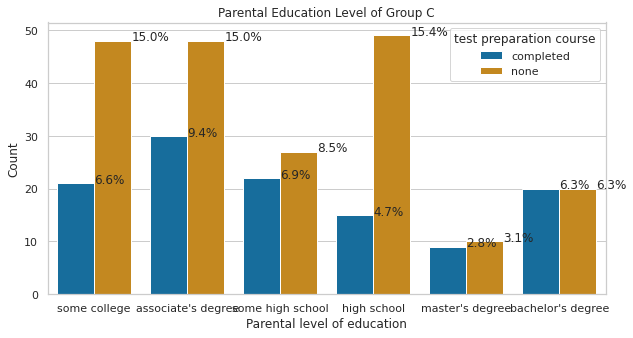

In [15]:
# Visualize percentail of degree holders in chart

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
chart = sns.countplot(x='parental level of education', data=df[df['race/ethnicity'] == 'group C'], palette='colorblind', hue="test preparation course")
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.title('Parental Education Level of Group C')

# Show percentails of degress holders
for p in chart.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chart.annotate(percentage, (x, y),ha='left')

    
plt.show()


**To be continued...**